# Import Libraries

In [114]:
# Python Structs Type using for Wide Variety Mathematical Operations Like Arrays
import numpy as np 

# Working with the DataFrame
import pandas as pd

#Dealing With Warnings
import warnings

In [115]:
# Importing the Model_SVM libarys

from sklearn.svm import SVR
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [116]:
#Store the data into the variable df
df = pd.read_csv('Bit_AfterClean.csv')
#Do not show warnings
warnings.filterwarnings("ignore")

In [117]:
df3 = df.copy()

In [118]:
#A variable for predicting 'n' days out into the future
prediction_days = 30 #n = 30 days

#Create another column (the target or dependent variable)
df['PREDICTION'] = df[['CLOSE']].shift(-prediction_days)

In [119]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(["CLOSE"], axis=1)

In [120]:
#CREATE THE INDEPENDENT DATA SET (X)

# Convert the dataframe to a numpy array and drop the prediction column
X = np.array(df.drop(['PREDICTION'],1))

#Remove the last 'n' rows where 'n' is the prediction_days
X= X[:len(df)-prediction_days]

In [121]:
#CREATE THE DEPENDENT DATA SET (y) 
# Convert the dataframe to a numpy array (All of the values including the NaN's) y = np.array(df['Prediction'])  
# Get all of the y values except the last 'n' rows 
y = np.array(df['PREDICTION']) 
y = y[:-prediction_days] 

# Prepring X,y

In [122]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set prediction_days_array equal to the last 30 rows of the original data set from the price column
prediction_days_array = np.array(df.drop(['PREDICTION'],1))[:prediction_days]

# Creating and train the Support Vector Models 

In [123]:
# Best Params To SVR_Models
E = [0.1,0.01,0.001,0.0001]
Cs = [10, 100, 1000, 10000]
param_grid = {'epsilon' : E, 'C': Cs}
grid_search = GridSearchCV(svm.SVR(), param_grid, cv=5)
grid_search.fit(X, y)
grid_search.best_params_
print(grid_search.best_params_)

{'C': 1000, 'epsilon': 0.1}


In [127]:
# Create and train the Support Vector Machine 
svr_rbf = SVR(epsilon=0.1, C=1000)#Create the model
svr_rbf.fit(x_train, y_train) #Train the model

SVR(C=1000)

# Predict's Results

In [128]:
# Testing Model: Score returns the accuracy of the prediction. 
# The best possible score is 1.0
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  0.9330397948765241


In [129]:
# Print the model predictions for the next 'n=30' days
svm_prediction = svr_rbf.predict(prediction_days_array)

In [130]:
svm_prediction

array([44497.36895346, 47061.00260319, 46710.12518619, 46936.10647875,
       46945.79995827, 45840.74667256, 45573.37888203, 44632.96575625,
       43502.86066015, 44200.50584644, 43648.77180347, 44140.35340654,
       45183.37710336, 45038.90171621, 44369.73914161, 46053.34644107,
       44861.41852219, 44826.52851985, 45774.64613961, 46474.65290764,
       46792.64763656, 45902.14145872, 45645.87309945, 48788.33651208,
       49268.65757783, 49275.21792928, 49290.1623138 , 49283.72844191,
       48961.6673327 , 48668.48306215])

Text(0, 0.5, '$ Close')

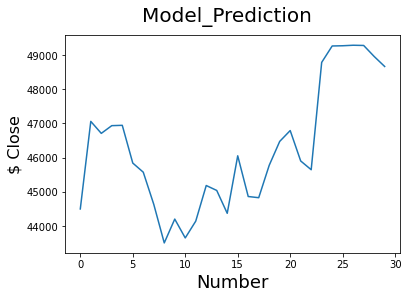

In [131]:
# Plot for the next 'n=30' days
import matplotlib.pyplot as plt
plt.plot(svm_prediction)
plt.suptitle('Model_Prediction', fontsize=20)  
plt.xlabel('Number', fontsize=18)                     
plt.ylabel('$ Close', fontsize=16)

Text(0, 0.5, '$ Price')

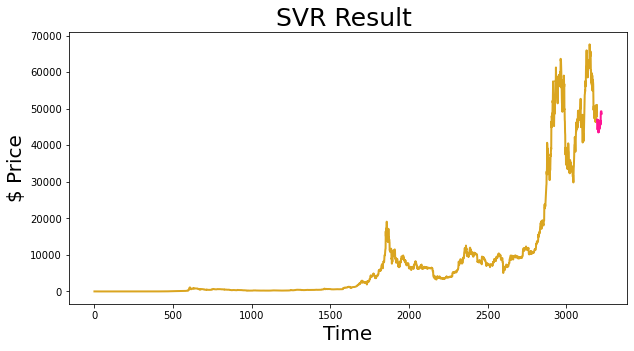

In [136]:
# Will Demonstate the Dates 
time1 =[]
time3 =[]
y = 3196
for i in range(0,3196):
    time1.append(i)
    y-=1

k = 30
for j in range(3196,3226):
    time3.append(j)
    k-=1

#Time-line Plots
plt.figure(figsize = (10, 5))
plt.plot(time1[0:3196], df3["CLOSE"][::-1], color='goldenrod', lw=2)
plt.plot(time3, svm_prediction, color='deeppink', lw=2)
plt.title("SVR Result ", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)